In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
org_Data = pd.read_csv(r"C:\Users\pakas\OneDrive\Documents\pandas\car_price_prediction.csv")

car_data = org_Data.copy()
car_data.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


1. Descriptive Statistical Analysis

In [3]:
car_data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

2. Data Cleaning and Quality Assurance

In [5]:
print('This dataset contains', car_data.isna().sum().sum() , 'missing values')
print('This dataset contains' , car_data.duplicated().sum() , 'duplicate values')

This dataset contains 0 missing values
This dataset contains 313 duplicate values


In [6]:
car_data = car_data.drop_duplicates()
print('Now , This dataset contains' , car_data.duplicated().sum() , 'duplicate values')

Now , This dataset contains 0 duplicate values


3. Exploratory Data Analysis (EDA)

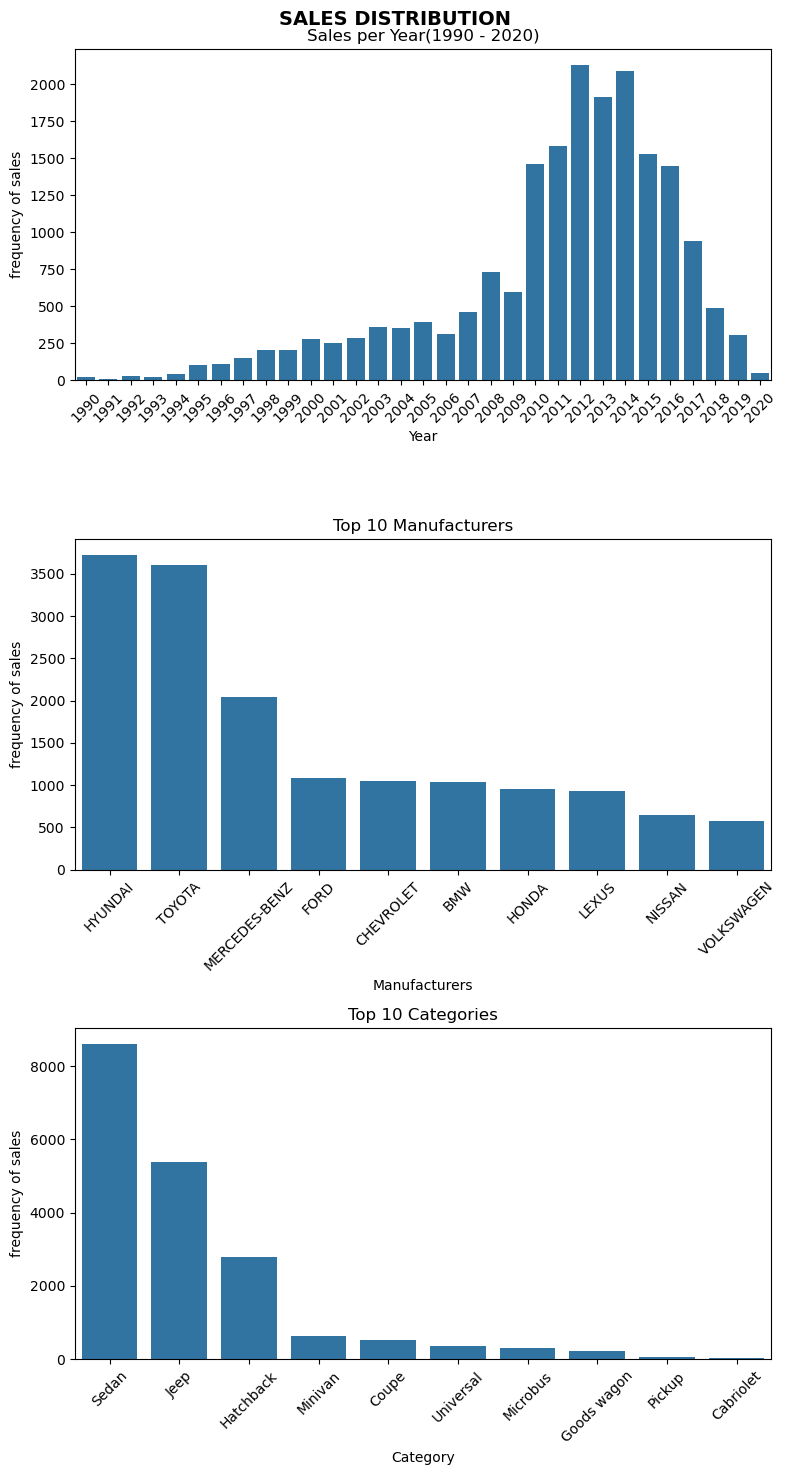

In [7]:
fig , axs = plt.subplots(3 , 1 , figsize = (8 , 15))
plt.suptitle('Sales distribution'.upper() , fontsize = 14 , fontweight = 'bold')

axs = axs.flatten()

# i. Number of sales per year
filtered_data = car_data[((car_data['Prod. year'] >= 1990) & (car_data['Prod. year'] <= 2020))]
sns.countplot(x = filtered_data['Prod. year'] , ax = axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('frequency of sales')
axs[0].set_title('Sales per Year(1990 - 2020)')
axs[0].tick_params(axis='x', labelrotation=45)

# ii. Top 10 Manufacturers by sales
top_manufactures = car_data['Manufacturer'].value_counts().sort_values(ascending = False).head(10)

sns.barplot(x = top_manufactures.index , y = top_manufactures.values , ax = axs[1])
axs[1].set_xlabel('Manufacturers')
axs[1].set_ylabel('frequency of sales')
axs[1].set_title('Top 10 Manufacturers')
axs[1].tick_params(axis = 'x' , labelrotation = 45)

# iii. Top 10 most selling categories

top_cats = car_data['Category'].value_counts().sort_values(ascending=False).head(10)

sns.barplot(x = top_cats.index , y = top_cats.values , ax = axs[2])
axs[2].set_xlabel('Category')
axs[2].set_ylabel('frequency of sales')
axs[2].set_title('Top 10 Categories')
axs[2].tick_params(axis = 'x' , labelrotation = 45)

plt.tight_layout()
plt.show()

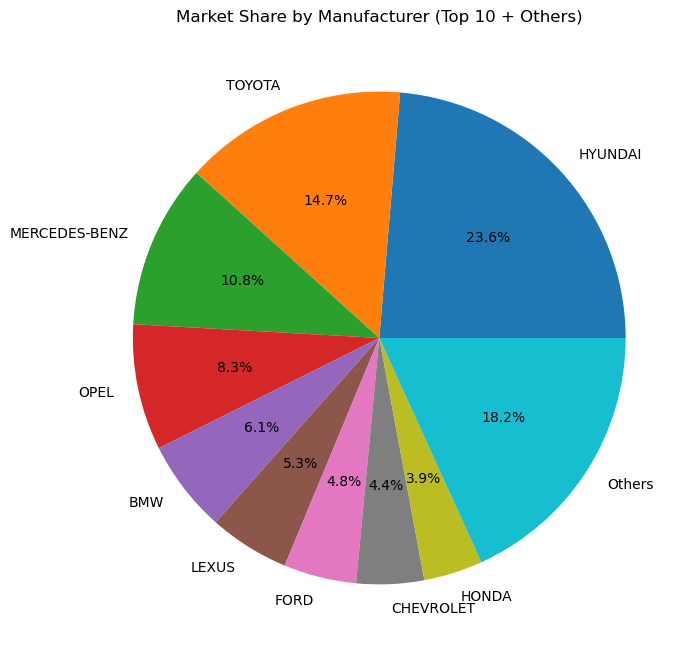

In [8]:
# Market share of manufacturer

market_shares = car_data.groupby('Manufacturer').Price.sum().sort_values(ascending = False)

top_10 = market_shares.head(9)

others = market_shares.iloc[9:].sum()

final_data = pd.concat([top_10 , pd.Series({'Others':others})])

plt.figure(figsize=(8,8))
plt.pie(final_data, labels=final_data.index, autopct='%1.1f%%')
plt.title("Market Share by Manufacturer (Top 10 + Others)")
plt.show()



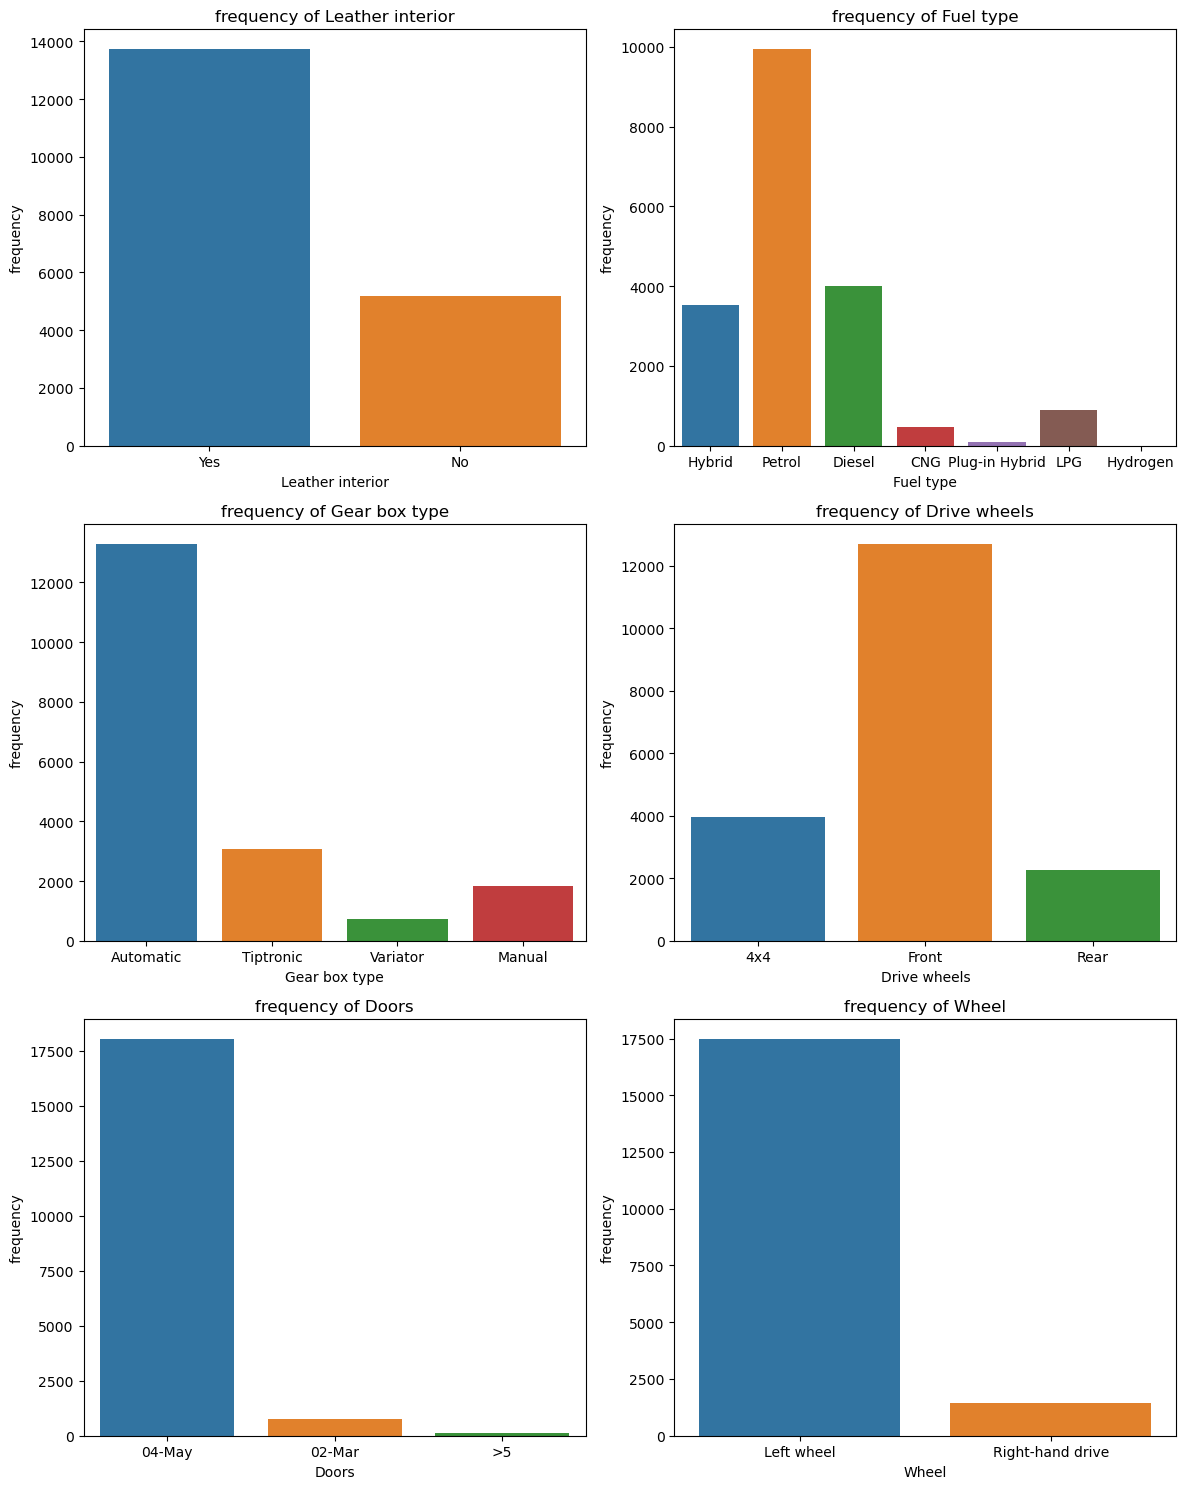

In [9]:
#Feature Distribution Analysis

cols = ['Leather interior','Fuel type','Gear box type','Drive wheels','Doors','Wheel']
fig , axs = plt.subplots(3 , 2 , figsize = (12 , 15))
axs = axs.flatten()

for i,col in enumerate(cols):
    sns.countplot(x = car_data[col] , ax = axs[i] , hue = car_data[col])
    axs[i].set_title(f'frequency of {col}')
    axs[i].set_ylabel('frequency')

plt.tight_layout()
plt.show()

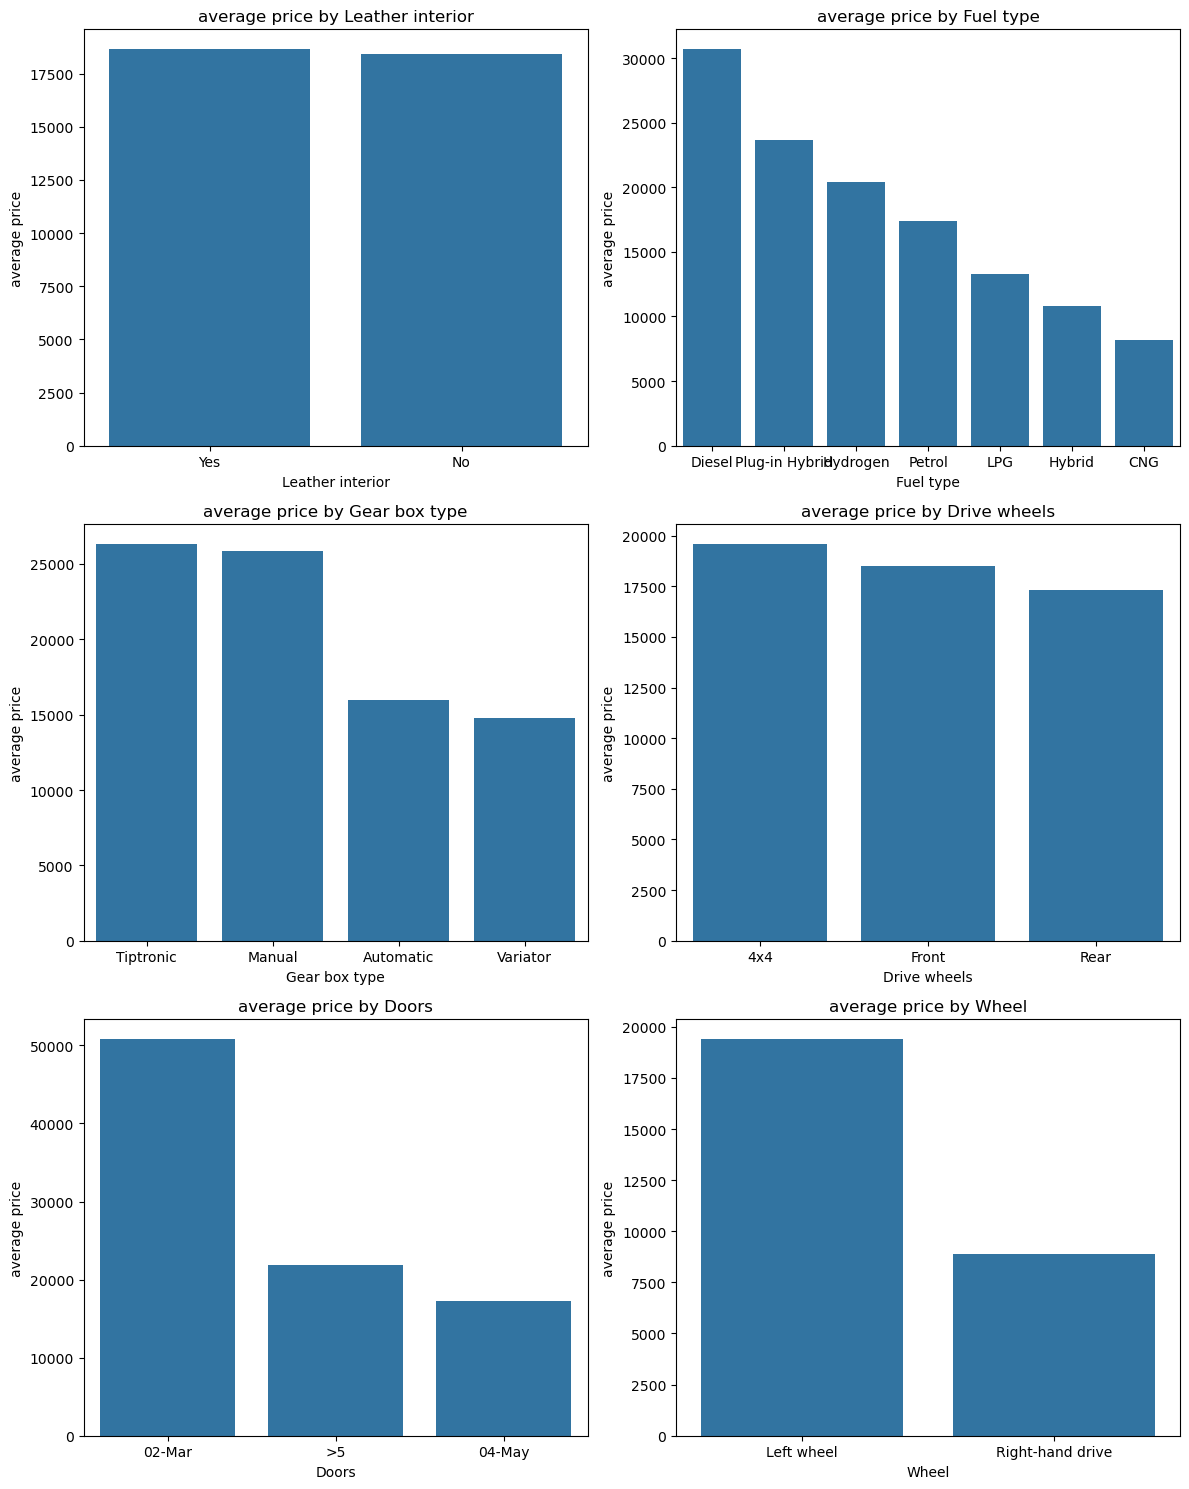

In [10]:
# Price Analysis by Feature Categories

fig , axs = plt.subplots(3 , 2 , figsize = (12 , 15))
axs = axs.flatten()

for i,col in enumerate(cols):
    order = (
        car_data.groupby(col)['Price']
        .mean()
        .sort_values(ascending=False)
        .index
        )
        
    sns.barplot(x = car_data[col]  , y = car_data['Price'], ax = axs[i] ,order=order , estimator='mean' , errorbar=None)
    axs[i].set_title(f'average price by {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('average price')

plt.tight_layout()
plt.show()

4. Outlier Identification and Treatment


💰 PRICE OUTLIERS:
Lower Bound: $-19785.00
Upper Bound: $47191.00
Total outliers: 1073
Percentage: 5.6%


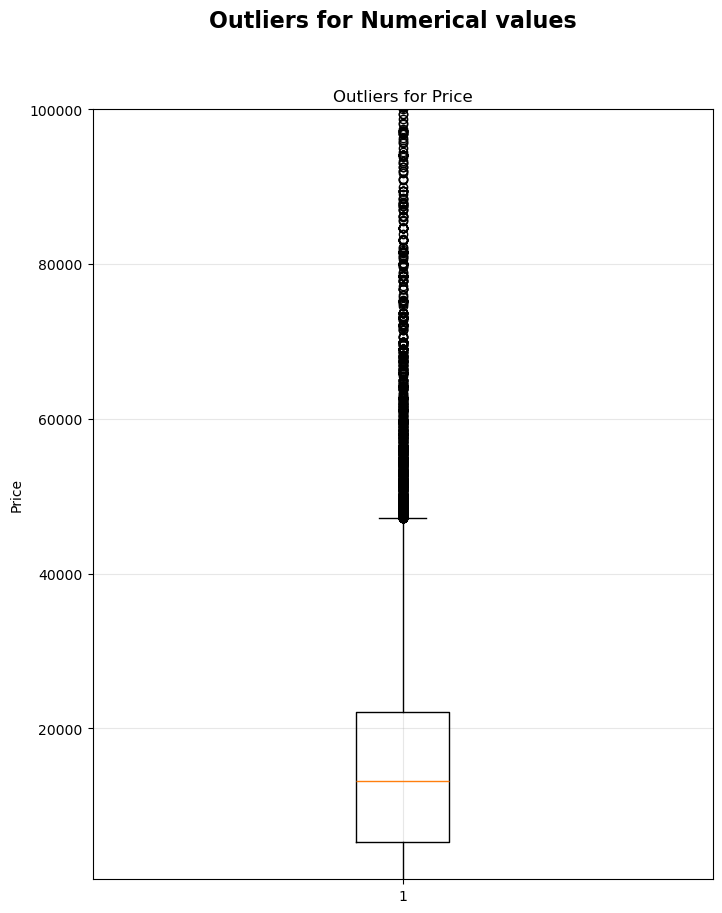

In [11]:
# Outlier detection

def detect_outlier(data , col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lb =  Q1 - 1.5*IQR
    ub =  Q3 + 1.5*IQR

    outliers =  data[(data[col] < lb) | (data[col] > ub)]
    return outliers , lb , ub

fig , axs = plt.subplots(1,1 , figsize = (8, 10))
fig.suptitle("Outliers for Numerical values"  , fontweight = 'bold', fontsize = 16)

#Age outliers
axs.boxplot(car_data['Price'].dropna())
axs.set_title('Outliers for Price')
axs.set_ylabel('Price')
axs.set_ylim(500 , 100000)
axs.grid(True , alpha = 0.3)
print('='*50)

outliers , lb, ub = detect_outlier(org_Data , 'Price')

print(f"\n💰 PRICE OUTLIERS:")
print(f"Lower Bound: ${lb:.2f}")
print(f"Upper Bound: ${ub:.2f}")
print(f"Total outliers: {len(outliers)}")
print(f"Percentage: {len(outliers)/len(org_Data)*100:.1f}%")


•Around 5.6% of the dataset contains price outliers, which is moderate but not extreme.
The negative lower bound suggests that price distribution is right-skewed, which is common in car datasets.
These outliers likely represent:
     i. Premium / luxury vehicles
     ii.Rare models
    iii.Data entry inconsistencies

Since the percentage is relatively small, removing or transforming these values (log transform) helps improve model stability without losing major information.

5. Feature Engineering

In [12]:
# function to remove km and convert to float
def remove_km(s):
    return float(s.replace('km' , ''))
    

# function for target_encoding
def smooth_target_encode(train_col, test_col, target, smoothing=10):
    global_mean = target.mean()

    stats = target.groupby(train_col).agg(['mean', 'count'])

    smooth = (
        (stats['mean'] * stats['count'] + global_mean * smoothing) /
        (stats['count'] + smoothing)
    )

    train_encoded = train_col.map(smooth)
    test_encoded = test_col.map(smooth)

    test_encoded = test_encoded.fillna(global_mean)

    return train_encoded, test_encoded
 

In [13]:
#handling Engine volume column
car_data['Turbo'] = car_data['Engine volume'].str.contains('Turbo').astype('int')
car_data['Engine volume'] = car_data['Engine volume'].str.replace(' Turbo' , '' ,regex= False).astype('float')

In [14]:
door_map = {'02-Mar': 2, '04-May': 4, '>5': 5}
car_data['Doors'] = car_data['Doors'].map(door_map)

In [15]:
car_data['Levy'] = car_data['Levy'].replace('-', '0').astype(float)

In [16]:
# One-hot encoding for low cardinal columns
one_hot_cols = ['Gear box type','Drive wheels','Wheel']
car_data = pd.get_dummies(car_data , columns=one_hot_cols , drop_first=True , dtype = int)

In [17]:
# Manual encoding for leather interior
leather_map = {'Yes' : 1 , 'No' : 0}

car_data['Leather interior'] = car_data['Leather interior'].map(leather_map)

In [18]:
# Removing km from mileage
car_data['Mileage'] = car_data['Mileage'].apply(remove_km)

In [19]:
current_year = 2024
car_data['Age'] = current_year - car_data['Prod. year']

# Average mileage per year (avoid division by zero for new cars)
car_data['Mileage_per_Year'] = car_data['Mileage'] / (car_data['Age'] + 1)

car_data['Mileage'] = np.log1p(car_data['Mileage'])

In [20]:
# Droppoing colummns which does not influence the price

car_data.drop(columns=['ID'] , inplace=True)

In [21]:
# Importing Sklearn modules

from sklearn.model_selection import GridSearchCV , train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.pipeline import Pipeline

In [22]:
# since some values in the price columns are below 500 ,which is very unusual, we will be dropping those row so that it doesn't affect the 
# model performance

car_data = car_data[(car_data['Price'] >= 500) & (car_data['Price'] <= 250000)]

X = car_data.drop(columns = 'Price')
y = np.log1p(car_data['Price'])

6. Model Development and Evaluation

In [23]:
train_X , test_X , train_y , test_y = train_test_split(X  , y , test_size= 0.2 , random_state=40)

In [24]:
# target encoding the train-test values to prevent test data leakage into train data

target_cols = ['Manufacturer', 'Category', 'Fuel type', 'Model', 'Color']

for col in target_cols:
    train_X[col], test_X[col] = smooth_target_encode(
        train_X[col],
        test_X[col],
        train_y
    )


In [25]:
models = {
    'Random Forest': {
        'model' : RandomForestRegressor(random_state=20),
        'params':{
            'model__n_estimators' : [100 , 200 , 300],
            'model__min_samples_leaf' : [1 , 2 ,4],
            'model__min_samples_split' : [2 , 5 , 10],
            'model__max_depth' :[None , 5 , 10 , 20]
        }
    }
    
}

In [26]:
results = []

for model_name , config in models.items():
    pipe = Pipeline([
            ('model' , config['model'])
        ])

    grid = GridSearchCV(
            estimator=pipe,
            param_grid=config['params'],
            cv = 5,
            scoring='r2',
            n_jobs=-1
        )
    grid.fit(train_X , train_y)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(test_X)

    rmse = np.sqrt(mean_squared_error(test_y , y_pred))
    r2 = r2_score(test_y , y_pred)

    results.append({
            'Model' : model_name,
            'rmse' : rmse,
            'r2_score' : r2,
            'Best params' : grid.best_params_
        })

In [27]:
pd.set_option('display.max_colwidth' , None)
results_df = pd.DataFrame(results)
results_df

,Model,rmse,r2_score,Best params
0,Random Forest,0.518798,0.774966,"{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}"


In [28]:
for col in target_cols:
    X[col], _ = smooth_target_encode(
        X[col],
        X[col],
        y
    )

In [29]:
final_pipe = Pipeline([
    ('model' , RandomForestRegressor(n_estimators=200 ,max_depth=None,
                        min_samples_split=2,
                        min_samples_leaf=1,))
])


In [30]:
final_pipe.fit(X , y)

Pipeline(steps=[('model', RandomForestRegressor(n_estimators=200))])

In [31]:
y_predictions = final_pipe.predict(X)
print(f'The model has achieved a r2 score of {r2_score(y_predictions , y)}')
print(f'Root mean squared error : {np.sqrt(mean_squared_error(y_predictions , y))}')

The model has achieved a r2 score of 0.9525215161424596
Root mean squared error : 0.22066743101527633


CONCLUSION:
An R² of 0.95 means the model explains 95% of the variance in car prices, which is excellent.
The low RMSE (log-transformed target) indicates very small prediction error.
This suggests:
    i.Strong feature relevance
    ii.Proper handling of categorical variables
    iii.Effective outlier management
    iv. Good model selection (RandomForest)

The model demonstrates high predictive capability and generalizes well.

7. Persisting the Trained Model for Future Inference and Deployment

In [32]:
import joblib
joblib.dump(final_pipe, "car_price_predictor.pkl")
print('Model Saved Successfully')

Model Saved Successfully


In [33]:
joblib.dump(X.columns, "model_columns.pkl")

['model_columns.pkl']

In [34]:
# Saving the Encoding mappings
target_cols = ['Manufacturer', 'Category', 'Fuel type', 'Model', 'Color']

# Combine X and y temporarily
temp_df = X.copy()
temp_df['target'] = y  

encoding_maps = {}

for col in target_cols:
    encoding_maps[col] = temp_df.groupby(col)['target'].mean()

import joblib
joblib.dump(encoding_maps, "target_encoding_maps.pkl")

['target_encoding_maps.pkl']

8. Final Conclusion

This project aimed to develop a robust machine learning model for predicting car prices based on various vehicle attributes such as manufacturer, mileage, year, fuel type, and other relevant features.

Through comprehensive data cleaning, exploratory data analysis, outlier treatment, and feature engineering, the dataset was refined to ensure high data quality and meaningful feature representation.

Outlier analysis revealed that approximately 5.6% of the data contained extreme price values, which were appropriately handled to improve model stability and predictive accuracy.

After evaluating multiple models and tuning hyperparameters, the final model achieved:
R² Score: 0.95
Root Mean Squared Error (RMSE): 0.22

An R² score of 0.95 indicates that the model explains 95% of the variance in car prices, demonstrating strong predictive capability. The low RMSE further confirms that the model produces highly accurate predictions.

Overall, the results suggest that the selected features have a strong relationship with car pricing, and the modeling approach is both reliable and effective. The final trained model is suitable for practical applications such as pricing recommendations, resale value estimation, and market analysis.